<a href="https://colab.research.google.com/github/gKorada/PythonNotebooks/blob/main/10_minute_story.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statsmodels==0.14.0
import statsmodels.api as sm

In [ ]:
import pandas as pd
import numpy as np
import datetime

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Large Data Sets for Python/worlddata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CountryName    object 
 1   CountryCode    object 
 2   IndicatorName  object 
 3   IndicatorCode  object 
 4   Year           int64  
 5   Value          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [ ]:
df_2010 = df[df['Year'] == 2010]
df_2010.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4839015,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,2010,84.342225
4839016,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,2010,71.969903
4839017,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,2010,93.828463
4839018,Arab World,ARB,Access to non-solid fuel (% of population),EG.NSF.ACCS.ZS,2010,86.003666
4839019,Arab World,ARB,"Access to non-solid fuel, rural (% of rural po...",EG.NSF.ACCS.RU.ZS,2010,74.552598


In [ ]:
df_pivot = pd.pivot(df_2010, values = 'Value', index = ['CountryName', 'CountryCode', 'Year'], columns = 'IndicatorName')
df_pivot.head()

,,IndicatorName,ARI treatment (% of children under 5 taken to a health provider),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Access to non-solid fuel (% of population),"Access to non-solid fuel, rural (% of rural population)","Access to non-solid fuel, urban (% of urban population)",Adequacy of social insurance programs (% of total welfare of beneficiary households),Adequacy of social protection and labor programs (% of total welfare of beneficiary households),Adequacy of social safety net programs (% of total welfare of beneficiary households),...,Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women's share of population ages 15+ living with HIV (%),"Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)"
CountryName,CountryCode,Year,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,2010,NaN,41.0,29.0,80.637334,18.611228,6.389254,58.981767,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,41.393168,NaN,NaN,NaN,NaN
Albania,ALB,2010,NaN,100.0,100.0,100.000000,60.263619,39.293641,79.372342,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,DZA,2010,NaN,99.3,97.9,99.843797,99.963244,99.220000,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,44.293015,NaN,NaN,NaN,NaN
American Samoa,ASM,2010,NaN,55.8,42.7,56.789354,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,ADO,2010,NaN,100.0,100.0,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ok, since in the lat visualization challenge, we wanted to find the effect of hospital beds on mortalisty rate, lets do the opposite. Lets find out what variables have the most effect on the number of hospital beds per 1000 people. I want to do a backwards approach to find the most relevant variable, so let's start doing that.

In [ ]:
df_reg = df_pivot.reset_index()
df_reg.head()

IndicatorName,CountryName,CountryCode,Year,ARI treatment (% of children under 5 taken to a health provider),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Access to non-solid fuel (% of population),"Access to non-solid fuel, rural (% of rural population)","Access to non-solid fuel, urban (% of urban population)",...,Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women's share of population ages 15+ living with HIV (%),"Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)"
0,Afghanistan,AFG,2010,NaN,41.0,29.0,80.637334,18.611228,6.389254,58.981767,...,NaN,NaN,NaN,NaN,NaN,41.393168,NaN,NaN,NaN,NaN
1,Albania,ALB,2010,NaN,100.0,100.0,100.000000,60.263619,39.293641,79.372342,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,DZA,2010,NaN,99.3,97.9,99.843797,99.963244,99.220000,100.000000,...,NaN,NaN,NaN,NaN,NaN,44.293015,NaN,NaN,NaN,NaN
3,American Samoa,ASM,2010,NaN,55.8,42.7,56.789354,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,ADO,2010,NaN,100.0,100.0,100.000000,100.000000,100.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_reg = df_reg.drop(['CountryCode','CountryName','Year'], axis = 1)
df_reg.head()

IndicatorName,ARI treatment (% of children under 5 taken to a health provider),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Access to non-solid fuel (% of population),"Access to non-solid fuel, rural (% of rural population)","Access to non-solid fuel, urban (% of urban population)",Adequacy of social insurance programs (% of total welfare of beneficiary households),Adequacy of social protection and labor programs (% of total welfare of beneficiary households),Adequacy of social safety net programs (% of total welfare of beneficiary households),...,Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women's share of population ages 15+ living with HIV (%),"Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)"
0,NaN,41.0,29.0,80.637334,18.611228,6.389254,58.981767,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,41.393168,NaN,NaN,NaN,NaN
1,NaN,100.0,100.0,100.000000,60.263619,39.293641,79.372342,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,99.3,97.9,99.843797,99.963244,99.220000,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,44.293015,NaN,NaN,NaN,NaN
3,NaN,55.8,42.7,56.789354,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,100.0,100.0,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
y = df_reg['Hospital beds (per 1,000 people)']
x = df_reg.drop(['Hospital beds (per 1,000 people)'], axis = 1)
y

,"Hospital beds (per 1,000 people)"
0,0.4
1,NaN
2,NaN
3,NaN
4,NaN
...,...
242,NaN
243,NaN
244,0.7
245,2.0


In [ ]:
missing_cols = x.columns[x.isnull().any()].tolist()
threshold = 0.5
cols_to_drop = [col for col in missing_cols if x[col].isnull().sum() / len(df_reg) > threshold]
x = x.drop(columns=cols_to_drop)
print("Dropped columns:", cols_to_drop)

Dropped columns: ['ARI treatment (% of children under 5 taken to a health provider)', 'Adequacy of social insurance programs (% of total welfare of beneficiary households)', 'Adequacy of social protection and labor programs (% of total welfare of beneficiary households)', 'Adequacy of social safety net programs (% of total welfare of beneficiary households)', 'Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households)', 'Adult literacy rate, population 15+ years, both sexes (%)', 'Adult literacy rate, population 15+ years, female (%)', 'Adult literacy rate, population 15+ years, male (%)', 'Agricultural irrigated land (% of total agricultural land)', 'All education staff compensation, primary (% of total expenditure in primary public institutions)', 'All education staff compensation, secondary (% of total expenditure in secondary public institutions)', 'All education staff compensation, tertiary (% of total expenditure in tertiary public institutions)', '

In [ ]:
x.replace([np.inf, -np.inf], np.nan, inplace=True)
x.fillna(x.mean(), inplace=True)
x.head()

IndicatorName,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Access to non-solid fuel (% of population),"Access to non-solid fuel, rural (% of rural population)","Access to non-solid fuel, urban (% of urban population)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, male (%)",Adjusted net national income (annual % growth),...,"Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)",Urban population,Urban population (% of total),Urban population growth (annual %),"Use of IMF credit (DOD, current US$)","Wage and salaried workers, total (% of total employed)"
0,41.0,29.0,80.637334,18.611228,6.389254,58.981767,92.099467,90.817885,91.910732,4.31479,...,9.147662,25.600000,19.600000,20.600000,20.557662,6903589.0,24.689,4.271538,3.552300e+08,66.635918
1,100.0,100.0,100.000000,60.263619,39.293641,79.372342,92.099467,90.817885,91.910732,8.29100,...,14.200000,23.700001,27.299999,25.799999,22.500000,1519519.0,52.163,1.609373,1.293710e+08,43.799999
2,99.3,97.9,99.843797,99.963244,99.220000,100.000000,98.984688,90.817885,91.910732,4.31479,...,10.000000,38.299999,19.100000,22.200001,21.500000,24333777.0,67.526,2.824082,1.845241e+09,33.000000
3,55.8,42.7,56.789354,65.711245,56.155664,77.313621,92.099467,90.817885,91.910732,4.31479,...,9.200000,20.808737,17.055340,18.180618,20.557662,48734.0,87.594,-1.172968,5.215784e+09,96.900002
4,100.0,100.0,100.000000,100.000000,100.000000,100.000000,92.099467,90.817885,91.910732,4.31479,...,9.147662,20.808737,17.055340,18.180618,20.557662,74134.0,87.817,-1.849677,5.215784e+09,66.635918


In [ ]:
y.fillna(y.mean(), inplace=True)
y.head()

,"Hospital beds (per 1,000 people)"
0,0.400000
1,3.184553
2,3.184553
3,3.184553
4,3.184553


In [ ]:
model1 = sm.OLS(y, x).fit()
model1.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Hospital beds (per 1,000 people)   R-squared:                       1.000
Model:                                          OLS   Adj. R-squared:                    nan
Method:                               Least Squares   F-statistic:                       nan
Date:                              Tue, 19 Nov 2024   Prob (F-statistic):                nan
Time:                                      02:08:23   Log-Likelihood:                 4926.3
No. Observations:                               247   AIC:                            -9359.
Df Residuals:                                     0   BIC:                            -8492.
Df Model:                                       246                                         
Covariance Type:                          nonrobust                                         
=====================================================================================================================================================================================================
                                                                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Access to electricity (% of population)                                                                                            7.004e-14        inf          0        nan         nan         nan
Access to electricity, rural (% of rural population)                                                                               8.234e-14        inf          0        nan         nan         nan
Access to electricity, urban (% of urban population)                                                                               7.094e-14        inf          0        nan         nan         nan
Access to non-solid fuel (% of population)                                                                                         4.441e-14        inf          0        nan         nan         nan
Access to non-solid fuel, rural (% of rural population)                                                                           -8.728e-14        inf         -0        nan         nan         nan
Access to non-solid fuel, urban (% of urban population)                                                                            1.092e-13        inf          0        nan         nan         nan
Adjusted net enrolment rate, primary, both sexes (%)                                                                               8.644e-14        inf          0        nan         nan         nan
Adjusted net enrolment rate, primary, female (%)                                                                                   9.195e-14        inf          0        nan         nan         nan
Adjusted net enrolment rate, primary, male (%)                                                                                     8.377e-14        inf          0        nan         nan         nan
Adjusted net national income (annual % growth)                                                                                    -2.212e-14        inf         -0        nan         nan         nan
Adjusted net national income (constant 2005 US$)                                                                                   7.572e-13        inf          0        nan         nan         nan
Adjusted net national income (current US$)                                                                                        -3.463e-12        inf      

In [ ]:
x.corrwith(y)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,0
IndicatorName,
Access to electricity (% of population),0.275677
"Access to electricity, rural (% of rural population)",0.287388
"Access to electricity, urban (% of urban population)",0.225577
Access to non-solid fuel (% of population),0.308058
"Access to non-solid fuel, rural (% of rural population)",0.339293
...,...
Urban population,0.022457
Urban population (% of total),0.222595
Urban population growth (annual %),-0.336346


In [ ]:
import pandas as pd

# Set the correlation threshold
correlation_threshold = 0.8

# Calculate the correlation matrix
correlation_matrix = x.corr().abs()

# Create a mask for the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find columns with correlations above the threshold
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]

# Drop the columns from your DataFrame
x = x.drop(columns=to_drop)

print(f"Dropped columns: {to_drop}")

Dropped columns: ['Access to electricity, rural (% of rural population)', 'Access to electricity, urban (% of urban population)', 'Access to non-solid fuel (% of population)', 'Access to non-solid fuel, rural (% of rural population)', 'Access to non-solid fuel, urban (% of urban population)', 'Adjusted net enrolment rate, primary, female (%)', 'Adjusted net enrolment rate, primary, male (%)', 'Adjusted net national income (current US$)', 'Adjusted net national income per capita (annual % growth)', 'Adjusted net national income per capita (current US$)', 'Adjusted net savings, including particulate emission damage (% of GNI)', 'Adjusted net savings, including particulate emission damage (current US$)', 'Adjusted savings: carbon dioxide damage (current US$)', 'Adjusted savings: education expenditure (current US$)', 'Adjusted savings: mineral depletion (current US$)', 'Adjusted savings: natural resources depletion (% of GNI)', 'Adjusted savings: net national savings (% of GNI)', 'Adjusted

In [ ]:
x.head()

IndicatorName,Access to electricity (% of population),"Adjusted net enrolment rate, primary, both sexes (%)",Adjusted net national income (annual % growth),Adjusted net national income (constant 2005 US$),Adjusted net national income per capita (constant 2005 US$),"Adjusted net savings, excluding particulate emission damage (% of GNI)","Adjusted net savings, excluding particulate emission damage (current US$)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: consumption of fixed capital (current US$),...,Total tax rate (% of commercial profits),Trade in services (% of GDP),Transport services (% of commercial service exports),Travel services (% of commercial service exports),"Tuberculosis case detection rate (%, all forms)",Tuberculosis treatment success rate (% of new cases),"Unemployment, female (% of female labor force)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, male (% of male labor force)","Unemployment, male (% of male labor force) (national estimate)"
0,41.0,92.099467,4.31479,1.908883e+12,8882.849523,-25.501949,-4.066274e+09,0.497586,8.876791,1.406448e+09,...,36.300000,27.606526,7.339806,1.807193,53.0,86.0,12.400000,10.668301,8.000000,8.523095
1,100.0,92.099467,8.29100,1.908883e+12,8882.849523,7.504402,8.826870e+08,0.351410,12.663241,1.498600e+09,...,40.300000,38.517031,9.850925,63.603874,88.0,89.0,17.100000,15.900000,12.200000,12.800000
2,99.3,98.984688,4.31479,1.908883e+12,8882.849523,26.877498,4.327811e+10,0.696262,6.961023,1.120055e+10,...,73.000000,9.572080,21.479762,6.228237,71.0,89.0,19.400000,19.100000,8.100000,8.100000
3,55.8,92.099467,4.31479,1.908883e+12,8882.849523,8.090187,4.654159e+10,0.495183,11.333496,5.090448e+10,...,47.571326,25.509027,23.591929,41.812749,92.0,100.0,10.126487,10.668301,8.030396,8.523095
4,100.0,92.099467,4.31479,1.908883e+12,8882.849523,8.090187,4.654159e+10,0.145210,9.584985,3.222972e+08,...,47.571326,25.509027,23.591929,41.812749,95.0,86.0,10.126487,10.668301,8.030396,8.523095


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif_data

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,feature,VIF
0,Access to electricity (% of population),8729.274846
1,"Adjusted net enrolment rate, primary, both sex...",3526.785488
2,Adjusted net national income (annual % growth),9311.381444
3,Adjusted net national income (constant 2005 US$),5053.855172
4,Adjusted net national income per capita (const...,19889.118516
...,...,...
318,Tuberculosis treatment success rate (% of new ...,2445.817553
319,"Unemployment, female (% of female labor force)",52297.238884
320,"Unemployment, female (% of female labor force)...",6064.005993
321,"Unemployment, male (% of male labor force)",85384.983111


In [ ]:
def drop_high_vif_iteratively(x, vif_threshold=5):
  """
  Iteratively drops features with high VIF until all features are below the threshold.

  Args:
    x: DataFrame of independent variables.
    vif_threshold: The VIF threshold for dropping features.

  Returns:
    DataFrame with features having VIF below the threshold.
  """
  while True:
    vif_data = pd.DataFrame()
    vif_data["feature"] = x.columns
    vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    highest_vif_feature = vif_data.loc[vif_data['VIF'].idxmax()]  # Get feature with highest VIF

    if highest_vif_feature['VIF'] <= vif_threshold:
      break  # Exit loop if all VIFs are below the threshold

    print("Dropping:", highest_vif_feature['feature'], "with VIF:", highest_vif_feature['VIF'])
    x = x.drop(columns=[highest_vif_feature['feature']])

  return x

# Apply the iterative VIF reduction
x_reduced = drop_high_vif_iteratively(x.copy(), vif_threshold=5)  # Use a copy to avoid modifying original x

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Consumer price index (2010 = 100) with VIF: 8728397.700598627


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Agriculture, value added (constant LCU) with VIF: 1089172.8524451577


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Imports of goods and services (% of GDP) with VIF: 20004366.249436297


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Survival rate to the last grade of primary education, both sexes (%) with VIF: 6840814.166547316


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Adjusted net enrolment rate, primary, both sexes (%) with VIF: 17245386.772959933


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Population, female (% of total) with VIF: 60106962.76707271


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Distance to frontier score (0=lowest performance to 100=frontier) with VIF: 10036733.537112506


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: GDP per unit of energy use (PPP $ per kg of oil equivalent) with VIF: 9069494.245933946


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Services, etc., value added (% of GDP) with VIF: 10294700.507186275


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Immunization, DPT (% of children ages 12-23 months) with VIF: 3595221.577936779


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Currency composition of PPG debt, U.S. dollars (%) with VIF: 18083320.154753964


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Travel services (% of commercial service exports) with VIF: 9511959.529406294


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Net current transfers from abroad (current US$) with VIF: 3047869.491131557


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Employment to population ratio, 15+, male (%) (modeled ILO estimate) with VIF: 21233538.55122486


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Gross enrolment ratio, primary, both sexes (%) with VIF: 53459943.693632476


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Employment to population ratio, 15+, male (%) (national estimate) with VIF: 11071661.517936759


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Merchandise imports from high-income economies (% of total merchandise imports) with VIF: 6510446.880134314


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Food exports (% of merchandise exports) with VIF: 1304317.3284428616


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Manufactures imports (% of merchandise imports) with VIF: 5899834.420156668


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Documents to export (number) with VIF: 1977835.5121956822


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Merchandise imports from developing economies within region (% of total merchandise imports) with VIF: 755539.6268873968


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: CO2 emissions from electricity and heat production, total (% of total fuel combustion) with VIF: 1085717.980817129


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Cost to export (US$ per container) with VIF: 760198.9844081862


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Employment to population ratio, 15+, female (%) (modeled ILO estimate) with VIF: 1034786.4669078188


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Communications, computer, etc. (% of service exports, BoP) with VIF: 1339869.0626090928


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Unemployment, male (% of male labor force) with VIF: 579568.5885804105


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Share of women in wage employment in the nonagricultural sector (% of total nonagricultural employment) with VIF: 921362.1476299705


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Electricity production from hydroelectric sources (% of total) with VIF: 370377.504426307


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: CO2 emissions from liquid fuel consumption (% of total) with VIF: 2452668.96971926


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Primary to secondary general education transition rate, both sexes (%) with VIF: 4846622.0197750265


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Subsidies and other transfers (% of expense) with VIF: 1627083.9133589198


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Average grace period on new external debt commitments (years) with VIF: 862035.2258679699


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Average maturity on new external debt commitments (years) with VIF: 253673.38132019577


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Tax revenue (% of GDP) with VIF: 558620.951951164


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Burden of customs procedure, WEF (1=extremely inefficient to 7=extremely efficient) with VIF: 2324920.574484151


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Interest rate spread (lending rate minus deposit rate, %) with VIF: 254729.60203322547


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Health expenditure, public (% of GDP) with VIF: 800514.0287659969


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Percentage of students in secondary vocational education who are female (%) with VIF: 773338.227739769


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Official entrance age to lower secondary education (years) with VIF: 2097005.1806895346


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Net ODA received (% of imports of goods, services and primary income) with VIF: 464176.23144025385


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Short-term debt (% of total external debt) with VIF: 205469.77142062815


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Start-up procedures to register a business (number) with VIF: 671171.825660108


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Pump price for diesel fuel (US$ per liter) with VIF: 746928.5346110945


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Unemployment, female (% of female labor force) with VIF: 214031.2326745279


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Time required to build a warehouse (days) with VIF: 329520.91971866385


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: External balance on goods and services (current LCU) with VIF: 498940.7781839257


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Imports of goods and services (annual % growth) with VIF: 712339.4942338741


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Average grant element on new external debt commitments (%) with VIF: 1203751.508557613


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Tuberculosis treatment success rate (% of new cases) with VIF: 643280.0711520005


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: ICT goods exports (% of total goods exports) with VIF: 221141.1864102632


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Adjusted savings: consumption of fixed capital (current US$) with VIF: 1072194.1765913763


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Communications, computer, etc. (% of service imports, BoP) with VIF: 527365.6633564786


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Employment to population ratio, 15+, female (%) (national estimate) with VIF: 386825.92883765674


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Percentage of teachers in primary education who are female (%) with VIF: 660849.1788026387


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Official entrance age to primary education (years) with VIF: 1574267.4709617049


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Renewable energy consumption (% of total final energy consumption) with VIF: 287673.95360048674


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Employment in industry (% of total employment) with VIF: 783216.9455213775


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Procedures to build a warehouse (number) with VIF: 124375.21284606733


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: General government final consumption expenditure (% of GDP) with VIF: 92374.52963761594


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Quality of port infrastructure, WEF (1=extremely underdeveloped to 7=well developed and efficient by international standards) with VIF: 146663.948726152


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Pupil-teacher ratio in primary education (headcount basis) with VIF: 94163.31052219112


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: CO2 intensity (kg per kg of oil equivalent energy use) with VIF: 90442.87056856886


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Health expenditure, public (% of total health expenditure) with VIF: 159162.07348083938


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Merchandise exports to developing economies in Latin America & the Caribbean (% of total merchandise exports) with VIF: 55611.59224390568


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Interest payments on external debt (% of GNI) with VIF: 52822.312113399035


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Employment in agriculture (% of total employment) with VIF: 24300.662513818388


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Merchandise exports to high-income economies (% of total merchandise exports) with VIF: 15498.311632123838


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Periodicity and timeliness assessment of statistical capacity (scale 0 - 100) with VIF: 19406.258076844966


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Gross enrolment ratio, secondary, both sexes (%) with VIF: 3712.5874510971053


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Primary completion rate, both sexes (%) with VIF: 28304.648231716616


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Access to electricity (% of population) with VIF: 5602.163530480334


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Unemployment, male (% of male labor force) (national estimate) with VIF: 6144.555772274083


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Bank capital to assets ratio (%) with VIF: 4551.29708402181


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Compensation of employees (% of expense) with VIF: 1778.246813522142


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Health expenditure, private (% of GDP) with VIF: 806.3781775734615


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Procedures to register property (number) with VIF: 1161.4214696367794


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: GNI growth (annual %) with VIF: 849.2605470594364


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Price level ratio of PPP conversion factor (GDP) to market exchange rate with VIF: 1938.2975208579448


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: CO2 emissions from transport (% of total fuel combustion) with VIF: 1691.3153244808095


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Gross enrolment ratio, primary and secondary, gender parity index (GPI) with VIF: 64000.87489735422


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Gross enrolment ratio, primary, gender parity index (GPI) with VIF: 32276.07101116743


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Logistics performance index: Ease of arranging competitively priced shipments (1=low to 5=high) with VIF: 9363.546203824384


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Net barter terms of trade index (2000 = 100) with VIF: 931.7469787809279


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Out-of-pocket health expenditure (% of private expenditure on health) with VIF: 2447.1356641770735


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Manufacturing, value added (% of GDP) with VIF: 368.2181387913331


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Logistics performance index: Ability to track and trace consignments (1=low to 5=high) with VIF: 1992.755095107715


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Nitrous oxide emissions in industrial and energy processes (% of total nitrous oxide emissions) with VIF: 330.516909623886


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Population in urban agglomerations of more than 1 million (% of total population) with VIF: 375.7378369777391


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Adjusted savings: carbon dioxide damage (% of GNI) with VIF: 462.0927638569489


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Death rate, crude (per 1,000 people) with VIF: 452.58382544835814


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Manufactures exports (% of merchandise exports) with VIF: 256.98688908897253


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Grants and other revenue (% of revenue) with VIF: 260.2705832207782


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Electric power consumption (kWh per capita) with VIF: 252.97603445404337


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) with VIF: 269.93296714127325


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Final consumption expenditure, etc. (annual % growth) with VIF: 169.43668465068347


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Adolescent fertility rate (births per 1,000 women ages 15-19) with VIF: 257.9965344945393


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Smoking prevalence, males (% of adults) with VIF: 664.457261320006


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Military expenditure (% of GDP) with VIF: 142.6474879599507


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Public and publicly guaranteed debt service (% of GNI) with VIF: 175.61748534154418


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Energy related methane emissions (% of total) with VIF: 115.50563424331281


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Adjusted savings: gross savings (% of GNI) with VIF: 111.28257969773178


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Net ODA received (% of GNI) with VIF: 98.70944527656722


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Trade in services (% of GDP) with VIF: 90.92617551730096


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: External resources for health (% of total expenditure on health) with VIF: 85.35767900188416


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Adjusted net national income per capita (constant 2005 US$) with VIF: 78.43183399046762


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Merchandise exports to developing economies in Middle East & North Africa (% of total merchandise exports) with VIF: 67.78243678326429


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Adjusted savings: energy depletion (current US$) with VIF: 67.42430787561692


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Fuel imports (% of merchandise imports) with VIF: 74.92753309227953


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Theoretical duration of secondary education (years) with VIF: 651.0081290464996


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Gross enrolment ratio, tertiary, gender parity index (GPI) with VIF: 281.5768144261244


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Industry, value added (% of GDP) with VIF: 171.4198475631026


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Health expenditure, public (% of government expenditure) with VIF: 110.18458606043446


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Exports of goods and services (% of GDP) with VIF: 106.98455758067249


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Concessional debt (% of total external debt) with VIF: 103.05880897503799


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Deposit interest rate (%) with VIF: 66.60722381692145


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Average interest on new external debt commitments (%) with VIF: 70.8715864986698


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Adjusted net savings, excluding particulate emission damage (current US$) with VIF: 44.94405303190198


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: International tourism, receipts (% of total exports) with VIF: 41.35623580610245


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Age dependency ratio, old (% of working-age population) with VIF: 36.154524280034856


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Agriculture, value added (% of GDP) with VIF: 35.18893795763532


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Cost of business start-up procedures (% of GNI per capita) with VIF: 35.045581384462096


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Share of tariff lines with specific rates, all products (%) with VIF: 32.96283163282458


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Gross enrolment ratio, tertiary, both sexes (%) with VIF: 30.83985191232496


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Adjusted savings: energy depletion (% of GNI) with VIF: 30.276225117885105


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: CO2 emissions (metric tons per capita) with VIF: 28.847420537290294


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Agricultural land (sq. km) with VIF: 27.54994893467022


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: GDP growth (annual %) with VIF: 26.874991921603076


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Fixed broadband subscriptions (per 100 people) with VIF: 23.76120048850176


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Merchandise imports from developing economies outside region (% of total merchandise imports) with VIF: 22.313774189841943


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Net secondary income (BoP, current US$) with VIF: 21.767023700571148


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Agricultural methane emissions (% of total) with VIF: 20.470406233292383


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Multilateral debt service (% of public and publicly guaranteed debt service) with VIF: 20.12490842195207


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: GDP per person employed (constant 1990 PPP $) with VIF: 18.08834889456362


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Import value index (2000 = 100) with VIF: 17.374274711862185


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Insurance and financial services (% of commercial service imports) with VIF: 28.950764042207588


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Theoretical duration of primary education (years) with VIF: 384.40119336015965


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: CO2 emissions from manufacturing industries and construction (% of total fuel combustion) with VIF: 35.763768165985134


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Self-employed, total (% of total employed) with VIF: 61.88716146922867


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Gross intake ratio to Grade 1 of primary education, both sexes (%) with VIF: 471.5460797595864


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Time to export (days) with VIF: 60.56015701252771


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Total debt service (% of GNI) with VIF: 26.60425157084528


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Methodology assessment of statistical capacity (scale 0 - 100) with VIF: 64.25043669322808


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Adjusted savings: particulate emission damage (% of GNI) with VIF: 19.96310157823335


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Automated teller machines (ATMs) (per 100,000 adults) with VIF: 25.9912825549538


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Inflation, GDP deflator (annual %) with VIF: 20.150630772283222


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Merchandise imports from developing economies in East Asia & Pacific (% of total merchandise imports) with VIF: 28.88763922504588


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Transport services (% of commercial service exports) with VIF: 24.04924104668235


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Proportion of seats held by women in national parliaments (%) with VIF: 17.94805968726355


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Merchandise imports from economies in the Arab World (% of total merchandise imports) with VIF: 13.080605135297926


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Alternative and nuclear energy (% of total energy use) with VIF: 12.607932520049513


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Time to prepare and pay taxes (hours) with VIF: 27.329481351660952


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Forest area (% of land area) with VIF: 22.080789336439953


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Debt service (PPG and IMF only, % of exports of goods, services and primary income) with VIF: 19.6279574756912


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: External balance on goods and services (% of GDP) with VIF: 11.615042605018917


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Arable land (% of land area) with VIF: 10.862810200817055


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Portfolio Investment, net (BoP, current US$) with VIF: 10.646216002210702


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Merchandise exports to developing economies in South Asia (% of total merchandise exports) with VIF: 10.332705084220535


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: CO2 emissions from solid fuel consumption (% of total) with VIF: 9.833633363060779


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Fuel exports (% of merchandise exports) with VIF: 9.47057849680116


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Population in largest city with VIF: 9.19403384611022


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Merchandise exports to developing economies in Sub-Saharan Africa (% of total merchandise exports) with VIF: 9.172936867136318


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Physicians (per 1,000 people) with VIF: 8.935341131439824


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Natural gas rents (% of GDP) with VIF: 8.825265682181772


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Short-term debt (% of total reserves) with VIF: 8.39308099843859


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Taxes on goods and services (% value added of industry and services) with VIF: 7.852597243577593


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Electricity production from natural gas sources (% of total) with VIF: 7.781580419107813


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) with VIF: 7.723868141105353


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Percentage of enrolment in primary education in private institutions (%) with VIF: 7.1962594510154965


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Percentage of repeaters in primary education, all grades, both sexes (%) with VIF: 6.987707390019038


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Combustible renewables and waste (% of total energy) with VIF: 6.856627024375507


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Average grace period on new external debt commitments, private (years) with VIF: 6.791600282455705


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Merchandise imports from developing economies in Sub-Saharan Africa (% of total merchandise imports) with VIF: 6.415197812010229


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Rural population (% of total population) with VIF: 6.345496814193067


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Total tax rate (% of commercial profits) with VIF: 11.408379206783069


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Livestock production index (2004-2006 = 100) with VIF: 177.83606713674965


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Average interest on new external debt commitments, private (%) with VIF: 9.505066133672269


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Pupil-teacher ratio in secondary education (headcount basis) with VIF: 47.3182629703074


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Dropping: Arable land (hectares per person) with VIF: 6.551092820690634


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Lifetime risk of maternal death (1 in: rate varies by country) with VIF: 5.572414449130734


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Commitments, IDA (COM, current US$) with VIF: 5.561096781748734


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Liner shipping connectivity index (maximum value in 2004 = 100) with VIF: 5.25375170148253


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Electric power transmission and distribution losses (% of output) with VIF: 5.193564018889325


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Adjusted net savings, excluding particulate emission damage (% of GNI) with VIF: 5.077332774244196


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: Computer, communications and other services (% of commercial service exports) with VIF: 5.016413558941617


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [ ]:
x_reduced.head()

IndicatorName,Adjusted net national income (annual % growth),Adjusted net national income (constant 2005 US$),Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: education expenditure (% of GNI),Adjusted savings: mineral depletion (% of GNI),Adjusted savings: net forest depletion (% of GNI),Adjusted savings: net forest depletion (current US$),Agricultural land (% of land area),Agricultural nitrous oxide emissions (% of total),Agricultural raw materials exports (% of merchandise exports),...,Taxes on international trade (% of revenue),Terrestrial and marine protected areas (% of total territorial area),Time required to enforce a contract (days),Time required to get electricity (days),Time required to register property (days),Time required to start a business (days),Total reserves (% of total external debt),Total reserves in months of imports,"Tuberculosis case detection rate (%, all forms)","Unemployment, female (% of female labor force) (national estimate)"
0,4.31479,1.908883e+12,8.876791,1.600000,0.000000,1.742697,2.788107e+08,58.067580,66.731745,10.767046,...,4.554859,0.372008,1642.000000,196.000000,250.000000,7.00000,213.030310,9.057423,53.0,10.668301
1,8.29100,1.908883e+12,12.663241,2.842804,0.162813,0.000000,0.000000e+00,43.843066,81.078676,2.390938,...,8.769963,9.476582,390.000000,177.000000,42.000000,7.00000,48.853076,4.855091,88.0,15.900000
2,4.31479,1.908883e+12,6.961023,4.467196,0.078251,0.242863,3.909991e+08,17.371334,49.778644,0.015788,...,3.923409,7.375091,630.000000,158.000000,55.000000,24.00000,2352.484577,36.779969,71.0,19.100000
3,4.31479,1.908883e+12,11.333496,4.376327,1.086691,1.650257,5.359483e+08,24.500000,66.731745,3.217938,...,8.769963,16.838152,618.689007,108.013893,58.266009,34.23977,95.120769,6.544940,92.0,10.668301
4,4.31479,1.908883e+12,9.584985,3.000000,0.000000,1.650257,5.359483e+08,42.765957,66.731745,3.217938,...,8.769963,9.829452,618.689007,108.013893,58.266009,34.23977,95.120769,6.544940,95.0,10.668301


In [ ]:
model1 = sm.OLS(y, x_reduced).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Hospital beds (per 1,000 people)   R-squared:                       0.770
Model:                                          OLS   Adj. R-squared:                  0.498
Method:                               Least Squares   F-statistic:                     2.837
Date:                              Tue, 19 Nov 2024   Prob (F-statistic):           1.42e-08
Time:                                      03:15:35   Log-Likelihood:                -245.28
No. Observations:                               247   AIC:                             758.6
Df Residuals:                                   113   BIC:                             1229.
Df Model:                                       133                                         
Covariance Type:                          nonrobust                                         
=====================================================================================================================================================================================================
                                                                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Adjusted net national income (annual % growth)                                                                                       -0.0021      0.021     -0.100      0.921      -0.045       0.040
Adjusted net national income (constant 2005 US$)                                                                                  -1.412e-14   1.85e-14     -0.762      0.448   -5.09e-14    2.26e-14
Adjusted savings: consumption of fixed capital (% of GNI)                                                                             0.0509      0.029      1.754      0.082      -0.007       0.108
Adjusted savings: education expenditure (% of GNI)                                                                                    0.0723      0.048      1.517      0.132      -0.022       0.167
Adjusted savings: mineral depletion (% of GNI)                                                                                       -0.0261      0.040     -0.654      0.514      -0.105       0.053
Adjusted savings: net forest depletion (% of GNI)                                                                                     0.0769      0.032      2.431      0.017       0.014       0.139
Adjusted savings: net forest depletion (current US$)                                                                               9.765e-12   4.22e-11      0.231      0.818   -7.39e-11    9.34e-11
Agricultural land (% of land area)                                                                                                    0.0037      0.006      0.638      0.524      -0.008       0.015
Agricultural nitrous oxide emissions (% of total)                                                                                    -0.0086      0.008     -1.114      0.268      -0.024       0.007
Agricultural raw materials exports (% of merchandise exports)                                                                        -0.0327      0.018     -1.868      0.064      -0.067       0.002
Agricultural raw materials imports (% of merchandise imports)                                                                         0.0738      0.142      0.520      0.604      -0.207       0.355
Agriculture value added per worker (constant 2005 US$)                                                                             -9.22e-06   7.61e-06     -

In [ ]:
pValues = model1.pvalues

In [ ]:
# Create a mask for features with p-values greater than 0.05
mask = pValues > 0.05

# Get the names of the features to drop
features_to_drop = pValues[mask].index

# Drop the features from your independent variable DataFrame
x_filtered = x.drop(columns=features_to_drop)

# Rebuild the model with the filtered features
model2 = sm.OLS(y, x_filtered).fit()

# Print the summary of the new model
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Hospital beds (per 1,000 people)   R-squared:                       0.916
Model:                                          OLS   Adj. R-squared:                  0.831
Method:                               Least Squares   F-statistic:                     10.76
Date:                              Tue, 19 Nov 2024   Prob (F-statistic):           4.05e-33
Time:                                      03:15:51   Log-Likelihood:                -120.25
No. Observations:                               247   AIC:                             490.5
Df Residuals:                                   122   BIC:                             929.2
Df Model:                                       124                                         
Covariance Type:                          nonrobust                                         
=================================================================================================================================================================================================
                                                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Access to electricity (% of population)                                                                                          -0.0082      0.006     -1.458      0.148      -0.019       0.003
Adjusted net enrolment rate, primary, both sexes (%)                                                                             -0.0188      0.020     -0.943      0.348      -0.058       0.021
Adjusted net national income per capita (constant 2005 US$)                                                                    1.169e-05   2.31e-05      0.506      0.614   -3.41e-05    5.74e-05
Adjusted net savings, excluding particulate emission damage (% of GNI)                                                           -0.0054      0.018     -0.292      0.771      -0.042       0.031
Adjusted net savings, excluding particulate emission damage (current US$)                                                      5.441e-12   1.73e-12      3.139      0.002    2.01e-12    8.87e-12
Adjusted savings: carbon dioxide damage (% of GNI)                                                                               -0.6679      0.341     -1.957      0.053      -1.344       0.008
Adjusted savings: consumption of fixed capital (current US$)                                                                  -2.717e-12   1.63e-12     -1.671      0.097   -5.94e-12    5.02e-13
Adjusted savings: energy depletion (% of GNI)                                                                                    -0.0238      0.021     -1.124      0.263      -0.066       0.018
Adjusted savings: energy depletion (current US$)                                                                              -1.431e-11   6.63e-12     -2.158      0.033   -2.74e-11   -1.18e-12
Adjusted savings: gross savings (% of GNI)                                                                                        0.0088      0.022      0.397      0.692      -0.035       0.053
Adjusted savings: net forest depletion (% of GNI)                                                                                 0.0299      0.039      0.770      0.443      -0.047       0.107
Adjusted savings: particulate emission damage (% of GNI)                                                                         -0.3548      0.181     -1.958      0.053      -0.714       0.004
Adolescent fertilit

In [ ]:
x_filtered.columns

Index(['Access to electricity (% of population)',
       'Adjusted net enrolment rate, primary, both sexes (%)',
       'Adjusted net national income per capita (constant 2005 US$)',
       'Adjusted net savings, excluding particulate emission damage (% of GNI)',
       'Adjusted net savings, excluding particulate emission damage (current US$)',
       'Adjusted savings: carbon dioxide damage (% of GNI)',
       'Adjusted savings: consumption of fixed capital (current US$)',
       'Adjusted savings: energy depletion (% of GNI)',
       'Adjusted savings: energy depletion (current US$)',
       'Adjusted savings: gross savings (% of GNI)',
       ...
       'Time to prepare and pay taxes (hours)',
       'Total debt service (% of GNI)',
       'Total tax rate (% of commercial profits)',
       'Trade in services (% of GDP)',
       'Transport services (% of commercial service exports)',
       'Travel services (% of commercial service exports)',
       'Tuberculosis treatment success r

Ok now that I have the most relevant variables (and there are a lot), let's find the variables with the most impact on hospital beds.

In [ ]:
!pip install dmba
!pip install shap
!pip install lime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=22bd53d3899b6b90976351faf1b1f55c559e7a9900a83d79f137c5c92f5a1d3e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
#loading our usual libraries


import shap

#pandas and numpy
import pandas as pd
import numpy as np

#Scikit stuff
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, \
                            BaggingClassifier, BaggingRegressor, \
                            GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, \
                            classification_report, precision_score, \
                            accuracy_score, roc_curve, roc_auc_score
# import scikitplot as skplt

#dmba stuff
from dmba import regressionSummary, exhaustive_search
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import classificationSummary, gainsChart, liftChart, plotDecisionTree

# visualization and tuning the aesthetics
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
# plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = False)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.rc('font', size = 12)
plt.rc('figure', figsize = (6, 5))




Colab environment detected.


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_filtered, y, test_size=0.25, random_state=7)

In [ ]:
# Bagging: Decide the parameters for the new Decision Tree with ensemble
DTinfantreg_bag=RandomForestRegressor(max_features=4, random_state=23) # Bagging is special case of RF, when we use all features (3 in this case).

# Random forest: Decide the parameters for the new Decision Tree with ensemble
DTinfantreg_RF=RandomForestRegressor(max_features=4, random_state=23)

# Boosting: Decide the parameters for the new Decision Tree with ensemble
DTinfantreg_boost=GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=23) # Learning rate shrinks the contribution of each tree by learning_rate.

In [ ]:
DTinfantreg_bag.fit(X_train, Y_train)

DTinfantreg_RF.fit(X_train, Y_train)

DTinfantreg_boost.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=23)

In [ ]:
DTinfantreg_bag_pred = DTinfantreg_bag.predict(X_train)
DTinfantreg_RF_pred = DTinfantreg_RF.predict(X_train)
DTinfantreg_boost_pred = DTinfantreg_boost.predict(X_train)

In [ ]:
regressionSummary(Y_train, DTinfantreg_bag_pred)
regressionSummary(Y_train, DTinfantreg_RF_pred)
regressionSummary(Y_train, DTinfantreg_boost_pred)


Regression statistics

                      Mean Error (ME) : -0.0098
       Root Mean Squared Error (RMSE) : 0.3804
            Mean Absolute Error (MAE) : 0.2762
          Mean Percentage Error (MPE) : -14.7949
Mean Absolute Percentage Error (MAPE) : 20.7030

Regression statistics

                      Mean Error (ME) : -0.0098
       Root Mean Squared Error (RMSE) : 0.3804
            Mean Absolute Error (MAE) : 0.2762
          Mean Percentage Error (MPE) : -14.7949
Mean Absolute Percentage Error (MAPE) : 20.7030

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.2351
            Mean Absolute Error (MAE) : 0.1801
          Mean Percentage Error (MPE) : -7.2937
Mean Absolute Percentage Error (MAPE) : 11.8197


In [ ]:
index = x_filtered.columns

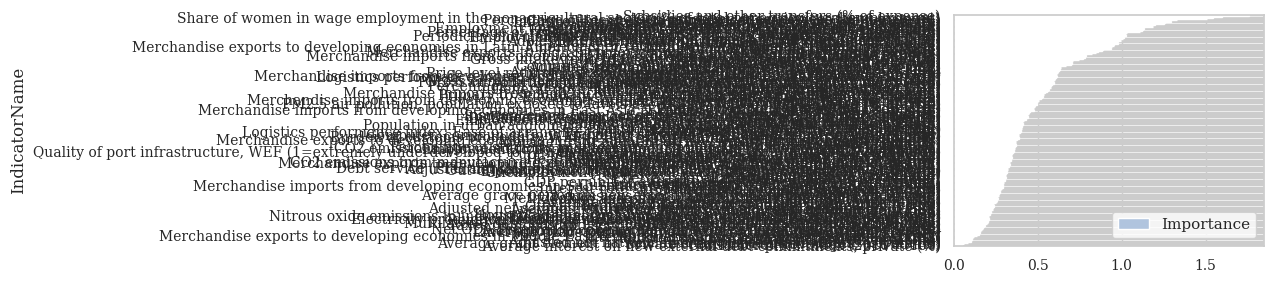

In [ ]:
Importance = pd.DataFrame({'Importance':DTinfantreg_bag.feature_importances_*100}, \
                          index)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='lightsteelblue', ) # kind='barh' : Horizontal bar
plt.gcf().set_size_inches(4, 3)

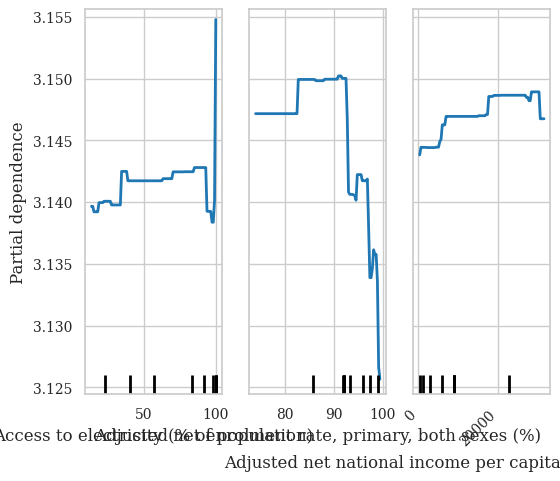

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features = [0, 1, 2]
display = PartialDependenceDisplay.from_estimator(DTinfantreg_bag, X_train, features)
plt.xticks(rotation=45, ha='right') # Rotate labels by 45 degrees
 # Adjust layout for better spacing
plt.show()

In [ ]:
# Get column names for Partial Dependence Plot
features = [0, 1, 2]
feature_names = X_train.columns[features]
print(feature_names)

Index(['Access to electricity (% of population)',
       'Adjusted net enrolment rate, primary, both sexes (%)',
       'Adjusted net national income per capita (constant 2005 US$)'],
      dtype='object', name='IndicatorName')


/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  pl.tight_layout()


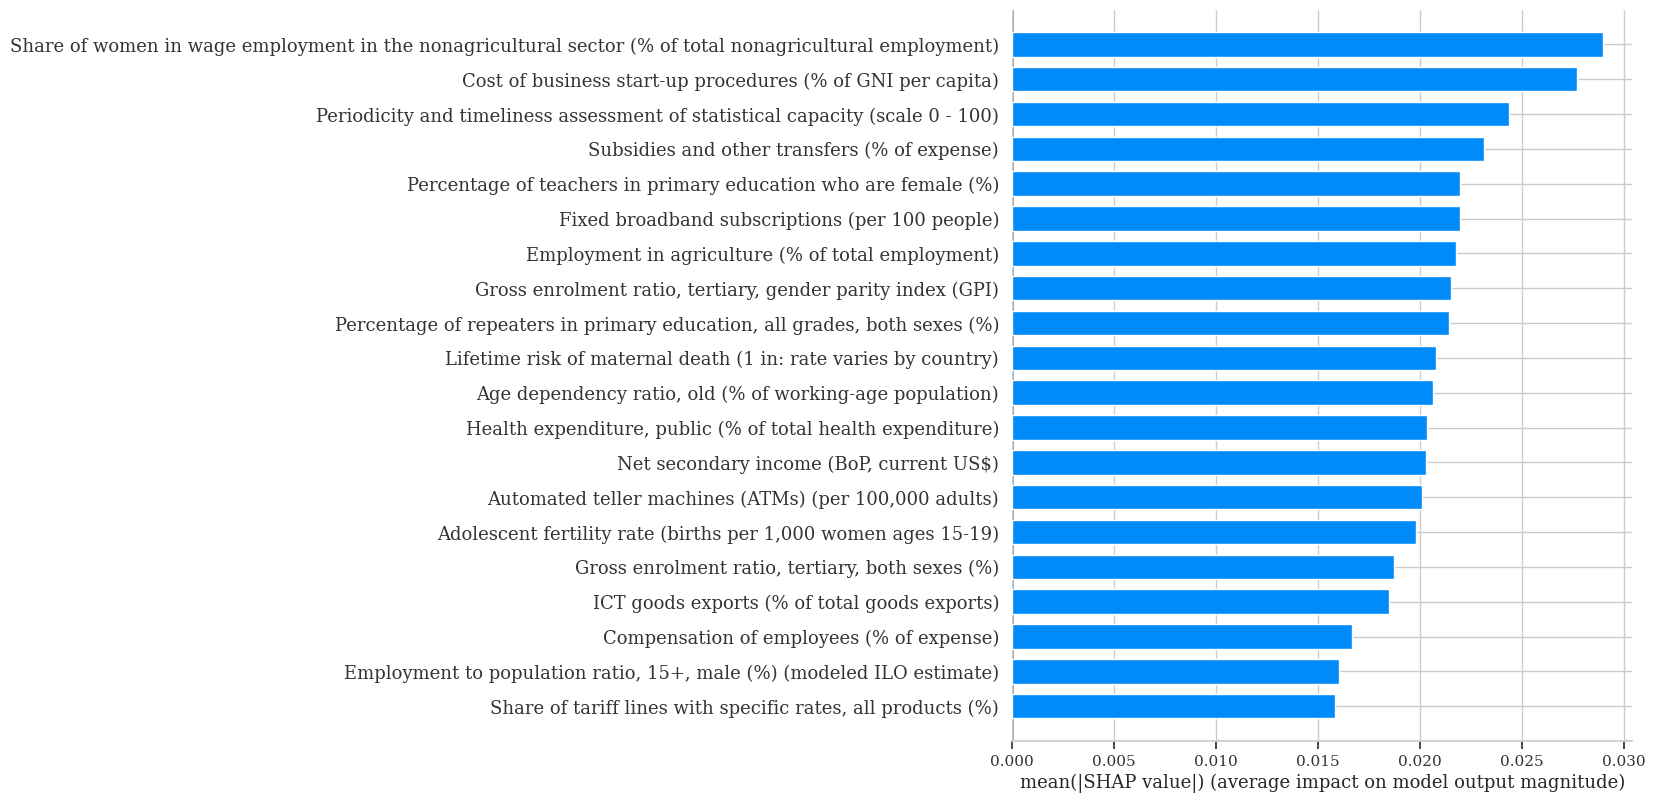

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  pl.tight_layout()


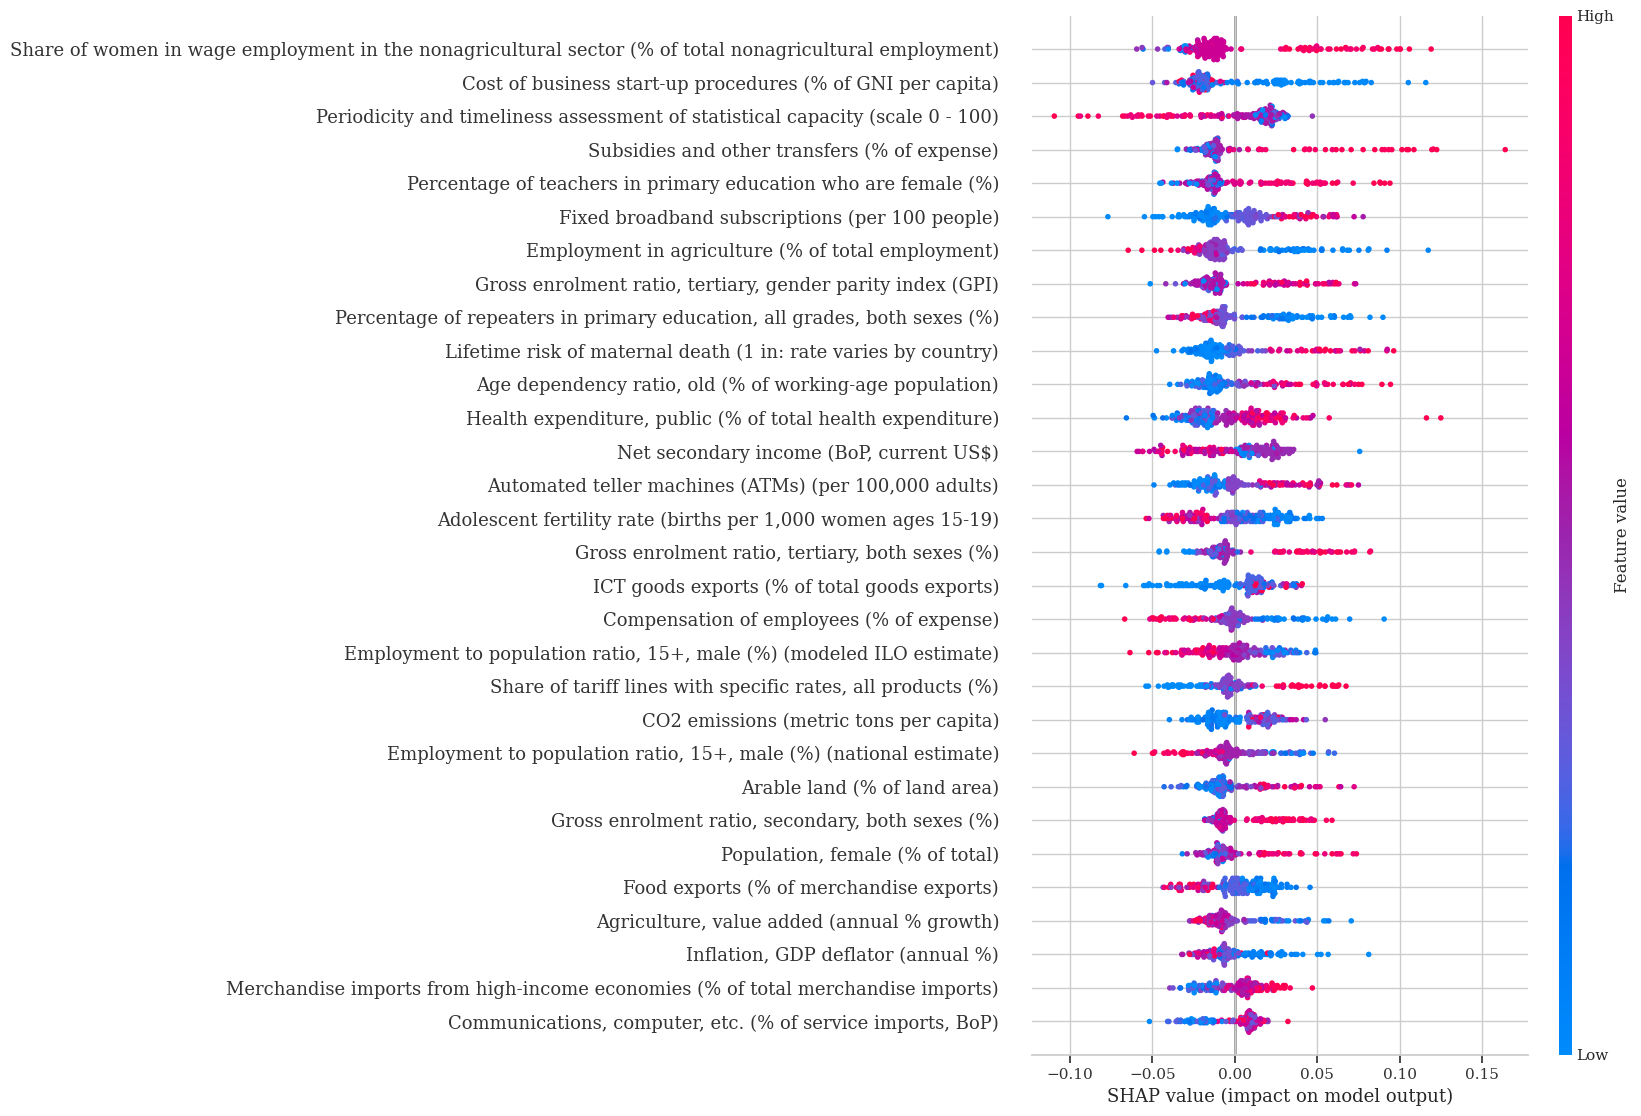

In [ ]:
explainer = shap.TreeExplainer(DTinfantreg_bag)
shap_values=explainer.shap_values(X_train)
expected_value = explainer.expected_value

shap.summary_plot(shap_values, X_train, plot_type="bar")

shap.summary_plot(shap_values, X_train, max_display=30)